In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Data Loading

In [2]:
classes = np.loadtxt('./data/classes.txt', dtype=str)
class_dict = {i+1:x for i, x in enumerate(classes)}
columns = ["CLASS", "TITLE", "DESCRIPTION"]
ag_new_train = pd.read_csv('./data/train.csv', header=None)
ag_new_train.columns = columns
ag_new_train.head()

,CLASS,TITLE,DESCRIPTION
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [3]:
train_df = pd.DataFrame(data=ag_new_train["TITLE"] + " " + ag_new_train["DESCRIPTION"], columns=["POST"])
train_df["LABEL"] = ag_new_train["CLASS"].map(class_dict)

In [4]:
train_df.head()

,POST,LABEL
0,Wall St. Bears Claw Back Into the Black (Reute...,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,Business
4,"Oil prices soar to all-time record, posing new...",Business


In [5]:
len(train_df)

120000

In [6]:
ag_new_test = pd.read_csv('./data/test.csv', header=None)
ag_new_test.columns = columns
ag_new_test.head()

,CLASS,TITLE,DESCRIPTION
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [7]:
test_df = pd.DataFrame(data=ag_new_test["TITLE"] + " " + ag_new_test["DESCRIPTION"], columns=["POST"])
test_df["LABEL"] = ag_new_test["CLASS"].map(class_dict)
test_df.head()

,POST,LABEL
0,Fears for T N pension after talks Unions repre...,Business
1,The Race is On: Second Private Team Sets Launc...,Sci/Tech
2,Ky. Company Wins Grant to Study Peptides (AP) ...,Sci/Tech
3,Prediction Unit Helps Forecast Wildfires (AP) ...,Sci/Tech
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,Sci/Tech


In [8]:
len(test_df)

7600

# EDA

In [9]:
def print_sample(index=None, df=train_df, return_sample=False):
    if index is None:
        index = np.random.randint(len(df))
    example = df.values[index]
    print(example[0])
    print('Label:', example[1])
    if return_sample:
        return example[0]

In [10]:
print_sample()

ABC #39;s  #39;MNF #39; crosses line with opening Instead of its five-second delay, ABC Sports should have hit the delete button on its opening for the Philadelphia Eagles-Dallas Cowboys game on Monday Night Football.
Label: Sports


## plots

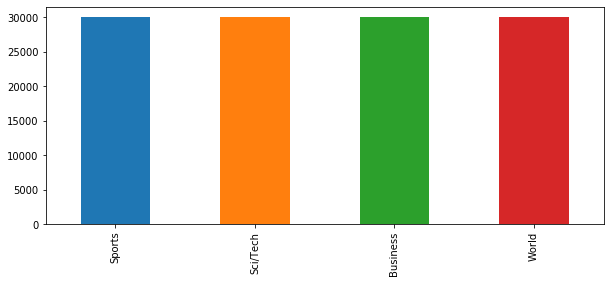

In [11]:
plt.figure(figsize=(10,4))
train_df["LABEL"].value_counts().plot(kind='bar');

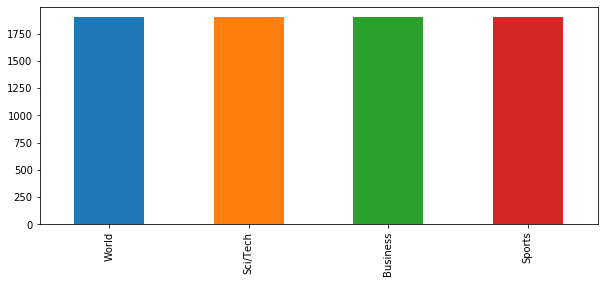

In [12]:
plt.figure(figsize=(10,4))
test_df["LABEL"].value_counts().plot(kind='bar');

In [13]:
pd.isnull(train_df['POST']).sum(), sum(train_df['POST'] == ""), sum(train_df['POST'] == " ")

(0, 0, 0)

In [14]:
train_df["POST_LENGTH"] = train_df["POST"].map(len)
train_df["POST_NUM_WORDS"] = train_df["POST"].map(lambda x: len(x.split()))

In [15]:
train_df.head()

,POST,LABEL,POST_LENGTH,POST_NUM_WORDS
0,Wall St. Bears Claw Back Into the Black (Reute...,Business,144,21
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Business,266,36
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business,232,36
3,Iraq Halts Oil Exports from Main Southern Pipe...,Business,256,36
4,"Oil prices soar to all-time record, posing new...",Business,234,37


In [16]:
image_dir = "images"
import os
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

In [17]:
def save_image(name):
    name = name.replace("/", "_")
    return plt.savefig(os.path.join(image_dir, name), bbox_inches="tight")

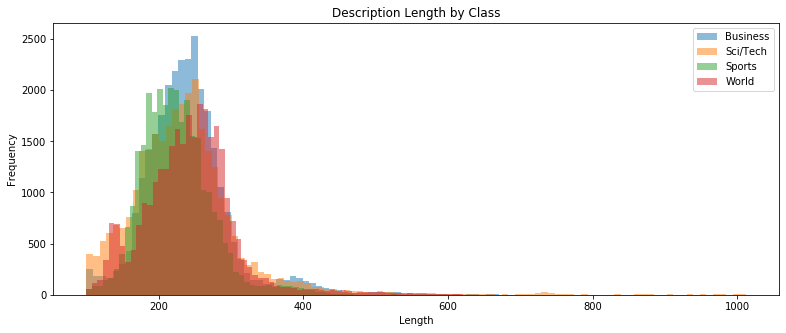

In [18]:
plt.figure(figsize=(13, 5))
for c in train_df.LABEL.unique():
    plt.hist(train_df[train_df["LABEL"] == c]["POST_LENGTH"], label=c, bins=100, alpha=0.5)
plt.legend()
plt.title("Description Length by Class")
plt.ylabel("Frequency")
plt.xlabel("Length")
save_image("desc_len")
plt.show()
plt.close()

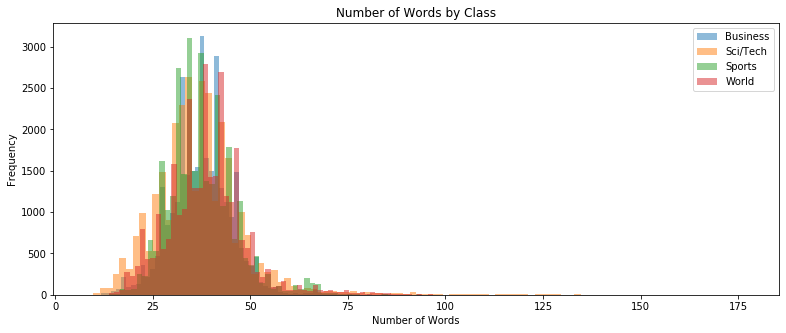

In [19]:
plt.figure(figsize=(13, 5))
for c in train_df.LABEL.unique():
    plt.hist(train_df[train_df["LABEL"] == c]["POST_NUM_WORDS"], label=c, bins=100, alpha=0.5)
plt.legend()
plt.title("Number of Words by Class")
plt.ylabel("Frequency")
plt.xlabel("Number of Words")
save_image("num_words")
plt.show()
plt.close()

## wordcloud

In [20]:
from wordcloud import WordCloud

In [21]:
concated_string = " ".join(train_df.POST)

In [22]:
def make_wordcloud(text, name=None):
    wordcloud = WordCloud(width=600, height=400, collocations=False).generate(text)
    plt.figure(figsize=(10,8), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    if name:
        save_image(name)
    plt.show()

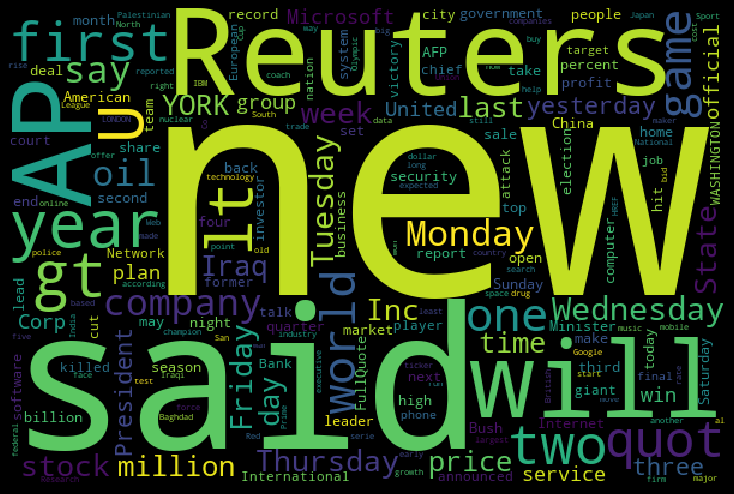

In [23]:
make_wordcloud(concated_string, "wordcloud")

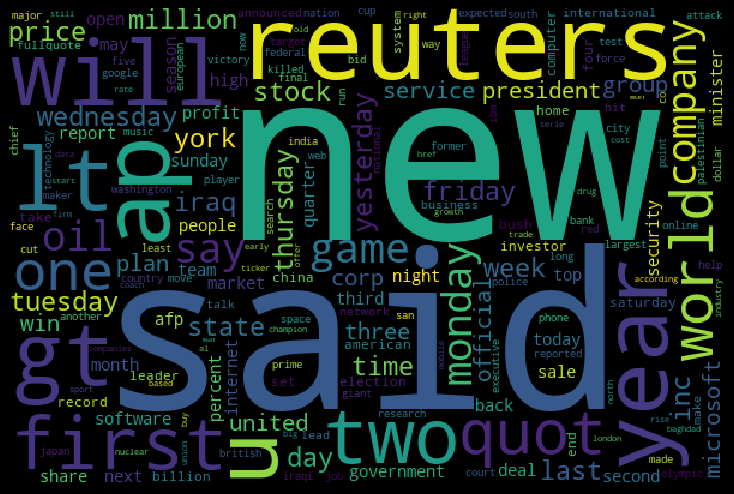

In [24]:
make_wordcloud(concated_string.lower(), "wordcloud_lower")

Business


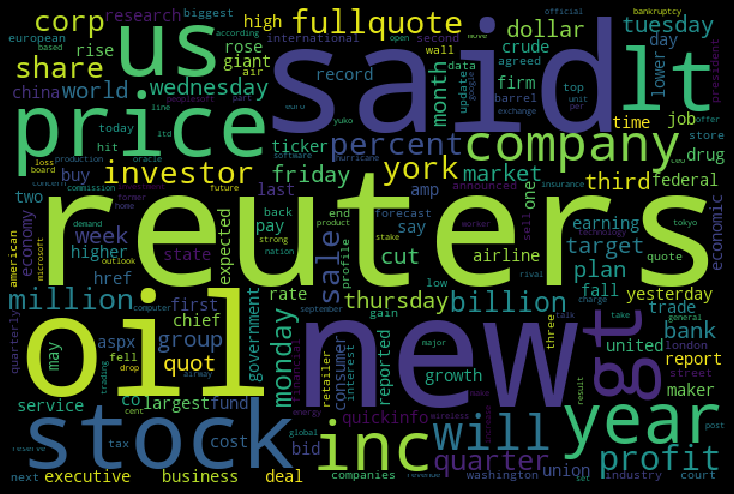


Sci/Tech


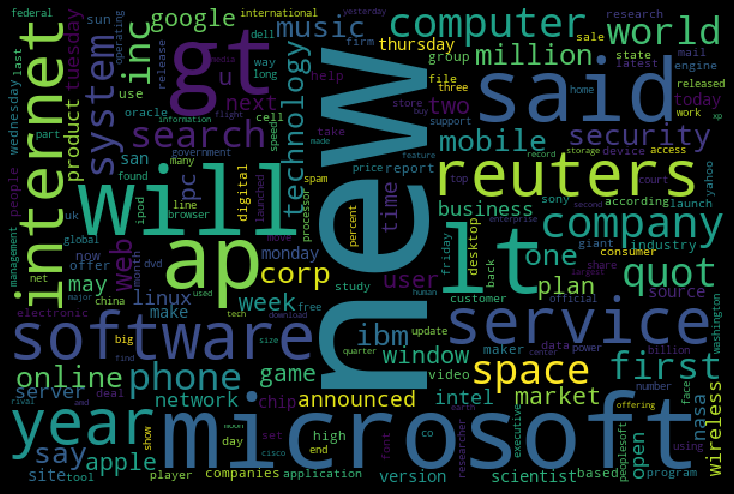


Sports


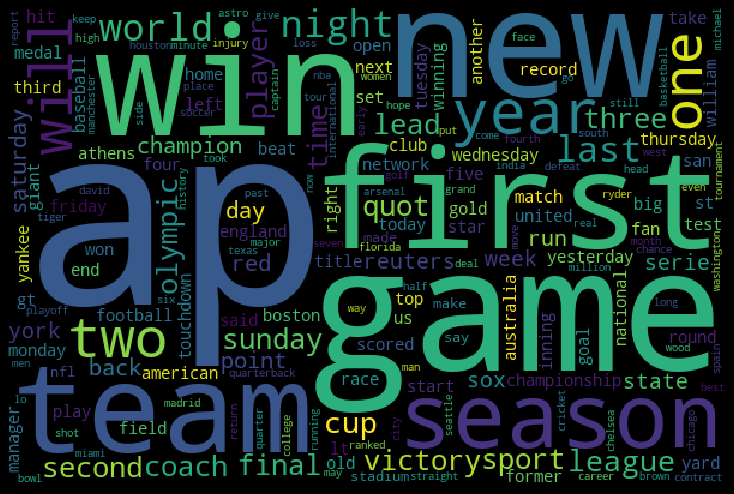


World


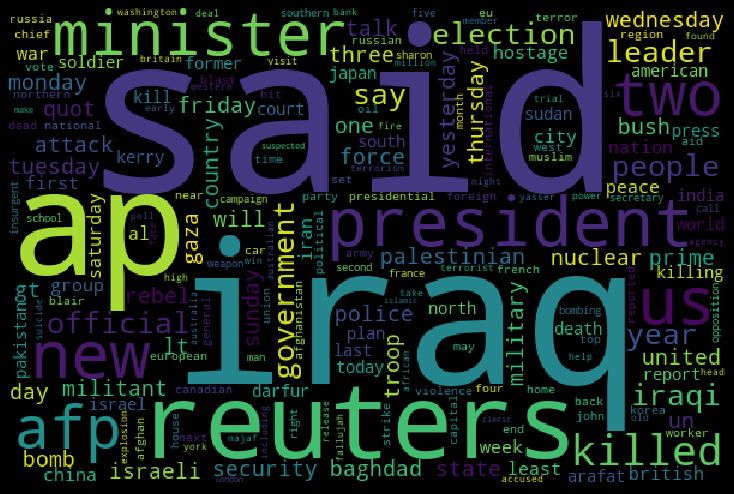

In [25]:
for categ in train_df["LABEL"].unique():
    print(categ)
    make_wordcloud(" ".join(train_df[train_df["LABEL"] == categ].POST).lower(), "wordcloud_{}".format(categ))
    print()

## Corpus exploration

In [26]:
import re

In [27]:
alnum = re.compile("[0-9a-zA-z]+")

In [28]:
from collections import Counter

def most_frequent_words(posts, top_k=10, stopwords=[], lower=False, alpha_num=False):
    cnts = {}
    for post in posts:
        if lower:
            post = post.lower()
            
        if alpha_num:
            post = " ".join(alnum.findall(post))
            
        tmp_cnt = Counter(post.split())        
        
        for word, count in tmp_cnt.items():    
            if word in stopwords:
                continue
                    
            if word in cnts:
                cnts[word] += count
            else:
                cnts[word] = count
    return sorted(cnts.items(), key=lambda tuple: tuple[1], reverse=True)[:top_k]

In [29]:
most_frequent_words(train_df["POST"])

[('the', 177529),
 ('to', 117605),
 ('a', 98112),
 ('of', 97395),
 ('in', 92055),
 ('and', 68046),
 ('on', 55156),
 ('for', 48430),
 ('-', 39105),
 ('#39;s', 30928)]

## stopwords

In [30]:
import nltk

In [31]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/sipan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords

In [33]:
stopwords.words()

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [34]:
stops = stopwords.words("english")

In [35]:
import spacy
spacy_en = spacy.load("en") # python3.6 -m spacy download en
stops_spacy = spacy.lang.en.stop_words.STOP_WORDS

In [36]:
len(stops), len(stops_spacy)

(179, 326)

In [37]:
[word for word in stops if word not in stops_spacy]

["you're",
 "you've",
 "you'll",
 "you'd",
 "she's",
 "it's",
 'theirs',
 "that'll",
 'having',
 's',
 't',
 'don',
 "don't",
 "should've",
 'd',
 'll',
 'm',
 'o',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [38]:
[word for word in stops_spacy if word not in stops]

['whereas',
 'three',
 'least',
 'eleven',
 "'s",
 'go',
 'see',
 'seems',
 'becoming',
 'six',
 'hereby',
 'keep',
 'others',
 'therefore',
 'moreover',
 'whence',
 '’s',
 'elsewhere',
 'anyhow',
 'none',
 'toward',
 'ca',
 'everyone',
 'rather',
 'bottom',
 'might',
 'even',
 'perhaps',
 'somewhere',
 'still',
 '‘d',
 'eight',
 'neither',
 '’d',
 'beforehand',
 'seeming',
 'become',
 'noone',
 '‘ll',
 'back',
 'nine',
 'either',
 'used',
 'since',
 'becomes',
 'everywhere',
 'mine',
 'please',
 'fifty',
 'nobody',
 'n’t',
 'twenty',
 '’re',
 'move',
 'using',
 'sometimes',
 'whereupon',
 'became',
 'often',
 'thereupon',
 'whether',
 'enough',
 'everything',
 'thereby',
 'whatever',
 '’ll',
 'empty',
 'otherwise',
 'former',
 'also',
 'hence',
 'one',
 'must',
 'thence',
 'well',
 'anyway',
 'herein',
 'whenever',
 'amount',
 'else',
 'whoever',
 "'m",
 'nothing',
 'sixty',
 'twelve',
 'whole',
 'behind',
 'give',
 '‘ve',
 'something',
 '‘m',
 'anyone',
 'already',
 'indeed',
 'part'

In [39]:
most_frequent_words(train_df["POST"], stopwords=stops)

[('-', 39105),
 ('#39;s', 30928),
 ('The', 25054),
 ('said', 16485),
 ('(Reuters)', 12798),
 ('US', 11545),
 ('new', 10228),
 ('A', 9174),
 ('(AP)', 8282),
 ('first', 8158)]

In [40]:
most_frequent_words(train_df["POST"], stopwords=stops, lower=True)

[('-', 39105),
 ('#39;s', 31129),
 ('new', 21047),
 ('said', 16613),
 ('(reuters)', 12811),
 ('us', 11846),
 ('first', 8898),
 ('two', 8836),
 ('(ap)', 8282),
 ('--', 7867)]

In [41]:
most_frequent_words(train_df["POST"], stopwords=stops, lower=True, alpha_num=True)

[('39', 44506),
 ('new', 21359),
 ('said', 20009),
 ('reuters', 19328),
 ('ap', 16276),
 ('gt', 13231),
 ('lt', 13182),
 ('us', 12893),
 ('\\', 11110),
 ('two', 10171)]

In [42]:
most_frequent_words(train_df["POST"][train_df.LABEL == "Sports"], stopwords=stops, lower=True, alpha_num=True)

[('39', 14826),
 ('ap', 6262),
 ('game', 4270),
 ('first', 4241),
 ('new', 4150),
 ('season', 3639),
 ('team', 3492),
 ('win', 3487),
 ('two', 3342),
 ('1', 3339)]

In [43]:
from pprint import pprint

In [44]:
for categ in train_df["LABEL"].unique():
    print(categ)
    pprint(most_frequent_words(train_df[train_df["LABEL"] == categ].POST, 10, stops, True))
    print()

Business
[('-', 9010),
 ('#39;s', 8939),
 ('said', 6655),
 ('new', 6505),
 ('oil', 6050),
 ('(reuters)', 5561),
 ('us', 5547),
 ('prices', 3727),
 ('inc.', 3551),
 ('company', 3302)]

Sci/Tech
[('-', 7853),
 ('new', 7015),
 ('#39;s', 6098),
 ('microsoft', 4567),
 ('said', 3219),
 ('software', 3143),
 ('internet', 2858),
 ('company', 2334),
 ('search', 2146),
 ('space', 2125)]

Sports
[('#39;s', 9508),
 ('-', 8728),
 ('new', 4088),
 ('first', 3853),
 ('win', 3237),
 ('ap', 3120),
 ('(ap)', 3095),
 ('game', 3077),
 ('world', 2854),
 ('team', 2816)]

World
[('-', 13514),
 ('#39;s', 6584),
 ('said', 5492),
 ('iraq', 4397),
 ('president', 3956),
 ('(reuters)', 3898),
 ('us', 3670),
 ('new', 3439),
 ('two', 3312),
 ('minister', 3101)]



In [45]:
def get_sample_with(expr, data=train_df["POST"], max_size=5, with_spaces=True):
    if with_spaces:
        found_data = [i for i in data if ' {} '.format(expr) in i]
    else:
        found_data = [i for i in data if expr in i]
    if len(found_data) == 0:
        print("no such examples")
    elif max_size >= len(found_data):
        for row in found_data:
            print(row, end="\n\n")
    else:
        for row in np.random.choice(found_data, max_size, False):
            print(row, end="\n\n")        

In [46]:
get_sample_with("#39;s")

Gary Sheffield #39;s shoulder bothered him for most of the season. (Al &lt;b&gt;...&lt;/b&gt; NEW YORK -- After three weeks of rest didn #39;t do the trick, Gary Sheffield will undergo arthroscopic surgery on his left shoulder on Tuesday.

Referendum confirmed, Chvez looks ahead CARACAS - Venezuelan leader Hugo Chvez urged his foes to accept their defeat and move on yesterday, after an audit of last week #39;s recall referendum confirmed the president #39;s victory.

Earth #39;s  #39;big brothers #39; floating around stars Washington - A new class of planets has been found orbiting stars besides our sun, in a possible giant leap forward in the search for Earth-like planets that might harbour life.

England beat Aussies to make final England have beaten world champions Australia in their ICC Champions Trophy semi-final at Edgbaston. It was England #39;s first one-day international win over their fiercest rivals for more than five years.

Carrefour posts 5.3 per cent profit rise, maintai

In [47]:
get_sample_with("&lt;a")

Memory boost for Nokia phones by  #39;05 &lt;a href="http://www.dallasnews.com/sharedcontent/dws/bus/stories/110304dnbusnokia.a233e.html"&gt;Nokia plans wave of camera phones&lt;/a&gt; &lt;font size=-1 color=#6f6f6f&gt;&lt;nobr&gt;Dallas Morning News (subscription)&lt;/nobr&gt;

SD in the cards for Nokia &lt;a href="http://news.com.com/NokiajoinsSecureDigitalindustrygroup/2100-1039_3-5365922.html"&gt;Nokia joins Secure Digital industry group&lt;/a&gt; &lt;font size=-1 color=#6f6f6f&gt;&lt;nobr&gt;CNET News.com&lt;/nobr&gt;

NASA finding supports  #39;frame-dragging #39; theory &lt;a href="http://www.reuters.com/newsArticle.jhtml?type=topNews storyID=6575621"&gt;Warped Satellites Prove Einstein Theory -Scientists&lt;/a&gt; &lt;font size=-1 color=#6f6f6f&gt;&lt;nobr&gt;Reuters&lt;/nobr&gt;

SD in the cards for Nokia &lt;a href="http://p2pnet.net/story/2429"&gt;Nokia takes up SD cards&lt;/a&gt; &lt;font size=-1 color=#6f6f6f&gt;&lt;nobr&gt;p2pnet.net&lt;/nobr&gt;

No Frills, but Everythin

In [48]:
mask = train_df["POST"].str.contains("&lt;")
mask.sum()

5241

In [49]:
mask2 = train_df["POST"].str.contains('&lt;a href="')
mask2.sum()

62

In [50]:
mask3 = train_df["POST"].str.contains('&gt;')
mask3.sum()

5243

In [51]:
train_df["POST"][mask ^ mask2].iloc[0]

"HP: The Adaptive Enterprise that can't adapt &lt;strong&gt;Opinion&lt;/strong&gt; SAP hardly to blame"

In [52]:
train_df["POST"][mask3 ^ mask].iloc[0]

'Hidden Java Features \\\\Really cool blog post about hidden Java features.  These are little tricks that\\you forget about from time to time but that make life more pleasant.\\\\This is a good one:\\\\"Instance initializers -- I\'ve been exploiting these lately to abbreviate list\\initialization (in unit tests only):\\&gt;\\List triple = new ArrayList(3) \\&gt;\\   add("a"); add("b"); add("c"); \\&gt;\\;"\\\\I\'ve been using static code blocks but this looks like it might be a better\\trick.\\\\Example:\\\\"public static List = new ArrayList();\\&gt;\\static \\    list.add( "foo" );\\"\\\\Also this final Closure  hack seems pretty cool:\\\\'

# Text Pre-processing

## capitalization

In [53]:
words = ["Canada", "CanadA", "CANADA", "tomcat", "Tomcat", "toMcat"]

In [54]:
for word in words:
    print("{} -> {} or {}".format(word, word.lower(), word.upper()))

Canada -> canada or CANADA
CanadA -> canada or CANADA
CANADA -> canada or CANADA
tomcat -> tomcat or TOMCAT
Tomcat -> tomcat or TOMCAT
toMcat -> tomcat or TOMCAT


## normalization

In [55]:
def normalize(text):
    text = text.replace("#39;", "'")
    text = text.replace("&lt;", "<")
    text = text.replace("&gt;", ">")
    
    return text

In [56]:
# or 
def normalize(text):
    text = text.replace("#39;", "'").replace("&lt;", "<").replace("&gt;", ">")
    
    return text

In [57]:
# might be useful for some corpuses
from unidecode import unidecode
texts = ["C'est la première fois que deux équipes @", "водка", u"北亰"]
for text in texts:
    print("{} -> {}".format(text, unidecode(text)))

C'est la première fois que deux équipes @ -> C'est la premiere fois que deux equipes @
водка -> vodka
北亰 -> Bei Jing 


## punctuation removal

In [58]:
from string import punctuation

In [59]:
punctuation = set(punctuation)

In [60]:
len(punctuation)

32

In [61]:
punctuation

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [62]:
def remove_punctuation(text):
    chars = "".join([char if char not in punctuation else " " for char in text ]) 
    return " ".join(chars.split())

In [63]:
# or with regex
def remove_punctuation2(text):
    return " ".join(alnum.findall(text))

In [64]:
np.random.seed(0)
sample = print_sample(return_sample=True)

NEC launches world #39;s fastest supercomputer Japanese electronics giant NEC Corp has begun selling the world #39;s fastest supercomputer. NEC claimed its SX-8 is the most powerful  quot;vector-type quot; supercomputer, with a sustainable 
Label: Sci/Tech


In [65]:
remove_punctuation(sample)

'NEC launches world 39 s fastest supercomputer Japanese electronics giant NEC Corp has begun selling the world 39 s fastest supercomputer NEC claimed its SX 8 is the most powerful quot vector type quot supercomputer with a sustainable'

In [66]:
remove_punctuation2(sample)

'NEC launches world 39 s fastest supercomputer Japanese electronics giant NEC Corp has begun selling the world 39 s fastest supercomputer NEC claimed its SX 8 is the most powerful quot vector type quot supercomputer with a sustainable'

## Noise removal

In [67]:
noise = re.compile(r"\d+|\D+")

In [68]:
def remove_noise(text):
    text = remove_punctuation(text)
    text = " ".join([word for word in noise.findall(text)])
    return " ".join([word for word in text.split() if word.isalnum()])

In [69]:
sample

'NEC launches world #39;s fastest supercomputer Japanese electronics giant NEC Corp has begun selling the world #39;s fastest supercomputer. NEC claimed its SX-8 is the most powerful  quot;vector-type quot; supercomputer, with a sustainable '

In [70]:
remove_noise(sample)

'NEC launches world 39 s fastest supercomputer Japanese electronics giant NEC Corp has begun selling the world 39 s fastest supercomputer NEC claimed its SX 8 is the most powerful quot vector type quot supercomputer with a sustainable'

## Lemmatization

In [71]:
from nltk.stem import WordNetLemmatizer
space_en = spacy.load("en", disable=["ner", "parser", "tagger"])
nltk_lemmatizer = WordNetLemmatizer()

In [72]:
sample = "Buffett closing on Gates in rich list Forbes magazine has again ranked Bill Gates as the richest person in the worth to 48 but investor Warren Buffett has edged"

In [73]:
def lemmatize_nltk(text):
    tokens = text.split()
    lemmas = [nltk_lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmas)

In [74]:
def lemmatize_spacy(text):
    text = space_en(text)
    lemmas = [token.lemma_ for token in text]
    return " ".join(lemmas)

In [75]:
lemmatize_nltk(sample)

'Buffett closing on Gates in rich list Forbes magazine ha again ranked Bill Gates a the richest person in the worth to 48 but investor Warren Buffett ha edged'

In [76]:
lemmatize_spacy(sample)

'Buffett close on Gates in rich list Forbes magazine have again rank Bill Gates a the rich person in the worth to 48 but investor Warren Buffett have edge'

## Stemming

In [77]:
from nltk.stem import PorterStemmer, SnowballStemmer

In [78]:
porter = PorterStemmer()
snowball = SnowballStemmer("english")

In [79]:
sample_clean = remove_noise(sample)

In [80]:
words = remove_noise(sample_clean).split()

In [81]:
porter_stems = [porter.stem(token) for token in words]
snowball_stems = [snowball.stem(token) for token in words]

In [82]:
spacy_lemmas = lemmatize_spacy(sample_clean).split()
nltk_lemmas = lemmatize_nltk(sample_clean).split()

In [83]:
pd.DataFrame({"words": words, "porter": porter_stems, "snowball": snowball_stems, 
              "spacy lemma": spacy_lemmas, "nltk lemma": nltk_lemmas})

,words,porter,snowball,spacy lemma,nltk lemma
0,Buffett,buffett,buffett,Buffett,Buffett
1,closing,close,close,close,closing
2,on,on,on,on,on
3,Gates,gate,gate,Gates,Gates
4,in,in,in,in,in
5,rich,rich,rich,rich,rich
6,list,list,list,list,list
7,Forbes,forb,forb,Forbes,Forbes
8,magazine,magazin,magazin,magazine,magazine
9,has,ha,has,have,ha


## Stop-word removal (already discussed)

# Choosing you metric (important!)

# Setting a baseline (important!)

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train_raw, X_val_raw, y_train, y_val = train_test_split(train_df["POST"], train_df["LABEL"], 
                                                          test_size=len(test_df), random_state = 17, # fixing seed!
                                                          stratify = train_df["LABEL"])
X_train_raw = np.array(X_train_raw)
X_val_raw = np.array(X_val_raw)
y_train = np.array(y_train)
y_val = np.array(y_val)

print(X_train_raw.shape, X_val_raw.shape)

(112400,) (7600,)


In [86]:
from fasttext import train_supervised
# from fastText import train_supervised

In [87]:
def to_fasttext_format(data: list, labels: list, save_path: str=None):
    ft_data = []
    for text, label in zip(data, labels):
        ft_data.append("__label__{} {}".format(label, text))
    if save_path:
        with open(save_path, "w+") as outfile:
            outfile.write("\n".join(ft_data))
    else:
        return ft_data

In [88]:
to_fasttext_format(X_train_raw, y_train, "train_raw.txt")
to_fasttext_format(X_val_raw, y_val, "val_raw.txt")

In [89]:
from tqdm import tqdm
# no random sandom seed in fasttext :/
def evaluate(train_data_path, val_data_path, k=9):
    scores, models = [], []
    
    for _ in tqdm(range(k)):
        model = train_supervised(train_data_path, loss="ns", minCount=5)
        scores.append(round(model.test(val_data_path)[-1]*100, 3))
        models.append(model)
    args = np.argsort(scores)
    median_index = args[len(args)//2]
    return scores[median_index], models[median_index], {"mean": np.mean(scores), "std": np.std(scores),
                                                        "max": max(scores), "min": min(scores)}

In [90]:
score1, model1, stats1 = evaluate("train_raw.txt", "val_raw.txt")

100%|██████████| 9/9 [00:37<00:00,  4.19s/it]


In [91]:
score1, stats1

(91.803,
 {'mean': 91.79977777777778,
  'std': 0.08074345900962732,
  'max': 91.908,
  'min': 91.632})

In [155]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,6), fontsize=10):
    df_cm = pd.DataFrame(
            confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
#     heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
#     heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

In [93]:
val_preds1 = model1.predict(list(X_val_raw)) # requires list as input

In [94]:
val_preds1[0][:3]

[['__label__World'], ['__label__Sports'], ['__label__Sports']]

In [95]:
val_preds1 = [pred[0].split("_")[-1] for pred in val_preds1[0]]

In [96]:
val_preds1[:3], y_val[:3]

(['World', 'Sports', 'Sports'],
 array(['World', 'Sports', 'Sports'], dtype=object))

In [97]:
classes

array(['World', 'Sports', 'Business', 'Sci/Tech'], dtype='<U8')

In [98]:
sorted(classes)

['Business', 'Sci/Tech', 'Sports', 'World']

In [99]:
confusion_matrix(y_val, val_preds1)

array([[1688,  147,    9,   56],
       [ 129, 1710,   12,   49],
       [   7,    8, 1862,   23],
       [  63,   67,   53, 1717]])

In [157]:
print(classification_report(y_val, val_preds1))

              precision    recall  f1-score   support

    Business       0.89      0.89      0.89      1900
    Sci/Tech       0.89      0.90      0.89      1900
      Sports       0.96      0.98      0.97      1900
       World       0.93      0.90      0.92      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600



# First pre-processing pipeline

In [101]:
# you can convert numbers to their textual form
def process_number(string_number):
    number = int(string_number)
    if number < 10:
        return "LT10"
    if number < 100:
        return "LTH"
    if number < 1000:
        return "LTT"
    return "GTT"

In [102]:
def simple_cleaning(text):
    text = text.replace(" #39;", "")
    text = text.replace("&lt;", "<")
    text = text.replace("&gt;", ">")
    text = text.replace(",", "")
    text = "".join([char if char not in punctuation else " " for char in text])
    text = text.lower()
    text_words = text.split()
    text_words2 = []
    for word in text_words:
        text_words2.extend(noise.findall(word))
    text_words2 = [word for word in text_words2 if word not in stops]
    text_words2 = [word if not word.isnumeric() else process_number(word) for word in text_words2]
    return " ".join(text_words2)

In [103]:
sample = print_sample(return_sample=True)

PalmSource unveils Cobalt OS PalmSource finally unveiled its new OS, version 1.1 of Palm OS Cobalt, as  quot;the first PalmOS designed specifically to support phones quot;.
Label: Sci/Tech


In [104]:
simple_cleaning(sample)

'palmsource unveils cobalt os palmsource finally unveiled new os version LT10 LT10 palm os cobalt quot first palmos designed specifically support phones quot'

In [105]:
data_processed = train_df["POST"].map(lambda text: simple_cleaning(text))

In [106]:
for categ in train_df["LABEL"].unique():
    categ_mask = train_df["LABEL"] == categ
    print(categ)
    needed_part = data_processed[categ_mask]
    print(round(needed_part.str.contains(" LT10 ").sum()/len(needed_part), 2), 
          round(needed_part.str.contains(" LTH ").sum()/len(needed_part), 2),
          round(needed_part.str.contains(" LTT ").sum()/len(needed_part), 2),
          round(needed_part.str.contains(" GTT ").sum()/len(needed_part), 2), end="\n\n")

Business
0.25 0.25 0.09 0.1

Sci/Tech
0.18 0.17 0.06 0.13

Sports
0.26 0.29 0.08 0.09

World
0.08 0.2 0.06 0.07



In [107]:
X_train_pr, X_val_pr, y_train, y_val = train_test_split(data_processed, train_df["LABEL"], 
                                                        test_size=len(test_df), random_state = 17, 
                                                        stratify = train_df["LABEL"])
X_train_pr = np.array(X_train_pr)
X_val_pr = np.array(X_val_pr)
y_train = np.array(y_train)
y_val = np.array(y_val)

print(X_train_pr.shape, X_val_pr.shape)

(112400,) (7600,)


In [108]:
to_fasttext_format(X_train_pr, y_train, "train_proc.txt")
to_fasttext_format(X_val_pr, y_val, "val_proc.txt")

In [109]:
score2, model2, stats2 = evaluate("train_proc.txt", "val_proc.txt")

100%|██████████| 9/9 [00:28<00:00,  3.17s/it]


In [110]:
score2, stats2

(91.776,
 {'mean': 91.74711111111111,
  'std': 0.0643712227706424,
  'max': 91.816,
  'min': 91.592})

In [111]:
score1 - score2 

0.027000000000001023

In [112]:
test_df.head()

,POST,LABEL
0,Fears for T N pension after talks Unions repre...,Business
1,The Race is On: Second Private Team Sets Launc...,Sci/Tech
2,Ky. Company Wins Grant to Study Peptides (AP) ...,Sci/Tech
3,Prediction Unit Helps Forecast Wildfires (AP) ...,Sci/Tech
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,Sci/Tech


In [113]:
test_data_processed = test_df.POST.map(lambda text: simple_cleaning(text))

In [114]:
to_fasttext_format(test_df.POST, test_df.LABEL, "test_raw.txt")
to_fasttext_format(test_data_processed, test_df.LABEL, "test_proc.txt")

In [115]:
test_score1 = model1.test("test_raw.txt")[-1]
test_score2 = model2.test("test_proc.txt")[-1]

In [116]:
test_score1 - test_score2

0.0026315789473684292

In [117]:
len(model1.get_words()), len(model2.get_words())

(44700, 26472)

In [118]:
m1_words = set(model1.get_words())
m2_words = set(model2.get_words())

In [119]:
char_model = train_supervised("train_proc.txt", minn=3, maxn=3, loss="ns", minCount=5)

In [120]:
"summer" in char_model.words

True

In [121]:
subwords, subword_ids = char_model.get_subwords("summer")

In [122]:
subwords

['summer', '<su', 'sum', 'umm', 'mme', 'mer', 'er>']

In [123]:
input_matrix = char_model.get_input_matrix()

In [124]:
input_matrix.shape

(2026472, 100)

In [125]:
len(char_model.words)

26472

In [126]:
summer_vec = char_model.get_word_vector("summer")

In [127]:
subword_vec = input_matrix[subword_ids[0]]
for id_ in subword_ids[1:]:
    subword_vec += input_matrix[id_]
subword_vec /= len(subword_ids)

In [128]:
np.allclose(subword_vec, summer_vec)

True

In [129]:
[i for i in m1_words if i not in m2_words]

['Quick',
 '\\$43',
 'HAGUE,',
 'Different',
 'Guides',
 '19,800',
 'volumes.',
 'sub-Saharan',
 'SportsNetwork',
 'Sporting',
 'Meanwhile,',
 '\\$125',
 'Shortfall',
 'Competitiveness',
 '&lt;br&gt;',
 'Movie',
 'Face',
 'Mercantile',
 'Aggressive',
 'to\\stop',
 'Sterling',
 'Vegas.',
 'across-the-board',
 'segment.',
 'Lotus',
 'Feeley',
 'draw,',
 'sold,',
 'Westinghouse',
 'resources,',
 'to\\the',
 'lows,',
 'Freddy',
 'UNCASVILLE,',
 'Ossetia,',
 'Guinea-Bissau',
 'Ark.',
 '(5-2)',
 'Angelos',
 '1980.',
 'Gilead',
 '(IAEA)',
 'Verizon,',
 'bronze.',
 'programme,',
 'sound,',
 'Juventus.',
 'Asked',
 'Gabba',
 'Criminal',
 'conference,',
 'PacifiCare',
 'Cup,',
 'smartphones.',
 'Lampard',
 'Prospective',
 'Senegalese',
 'Jordanian',
 'ambitions,',
 'Oracle-PeopleSoft',
 'giving,',
 'Stone,',
 'Mercer',
 'Brazilian',
 "Buffalo's",
 'GREEN',
 'with\\the',
 '\\$1.3',
 'Sentenced',
 'demands.',
 'metal.',
 'Talking',
 'insurgents.',
 'AP:',
 'non-governmental',
 '1,000,',
 '"will',


In [130]:
[i for i in m2_words if i not in m1_words]

['trenton',
 'prolonging',
 'gauhati',
 'nacho',
 'convicts',
 'abg',
 'heyer',
 'filderstadt',
 'metall',
 'jill',
 'ravages',
 'kumar',
 'porto',
 'mccann',
 'cubicle',
 'demolishes',
 'tick',
 'lakshmi',
 'rasheed',
 'chesnot',
 'hlinka',
 'levi',
 'saic',
 'middlesbrough',
 'pnet',
 'joachim',
 'wnba',
 'londoners',
 'sevlie',
 'smoltz',
 'ionics',
 'spaces',
 'canadian',
 'shwe',
 'malbrunot',
 'mcteer',
 'flexwiki',
 'enlists',
 'gelsinger',
 'monza',
 'rackspace',
 'brooks',
 'anderlecht',
 'argonauts',
 'gebrselassie',
 'charms',
 'meadows',
 'mulholland',
 'boro',
 'infotype',
 'hardcourt',
 'monterrey',
 'volkswagens',
 'kwok',
 'usd',
 'anigo',
 'kennedy',
 'fulham',
 'mallorca',
 'chronology',
 'joshua',
 'rediscovered',
 'roger',
 'pistons',
 'elon',
 'tantamount',
 'ichiro',
 'vincenzo',
 'tamada',
 'geicos',
 'snoop',
 'borussia',
 'verlander',
 'ted',
 'havent',
 'nicole',
 'leslie',
 'erroneous',
 'chelmsford',
 'oilsands',
 'soupmaker',
 'hyatt',
 'norilsk',
 'apec',


In [131]:
def evaluate_char(train_data_path, val_data_path, minn, maxn, k=9):
    scores, models = [], []
    
    for _ in tqdm(range(k)):
        model = train_supervised(train_data_path, loss="ns", minCount=5, minn=minn, maxn=maxn)
        scores.append(round(model.test(val_data_path)[-1]*100, 3))
        models.append(model)
    args = np.argsort(scores)
    median_index = args[len(args)//2]
    return scores[median_index], models[median_index], {"mean": np.mean(scores), "std": np.std(scores),
                                                        "max": max(scores), "min": min(scores)}

In [132]:
score3, model3, stats3 = evaluate_char("train_raw.txt", "val_raw.txt", minn=3, maxn=3)

100%|██████████| 9/9 [02:36<00:00, 17.37s/it]


In [133]:
score4, model4, stats4 = evaluate_char("train_raw.txt", "val_raw.txt", minn=3, maxn=3)

100%|██████████| 9/9 [02:38<00:00, 17.67s/it]


In [134]:
score3 - score4

-0.02599999999999625

In [135]:
stats3

{'mean': 91.25877777777778,
 'std': 0.039731817023019464,
 'max': 91.316,
 'min': 91.197}

In [136]:
stats4

{'mean': 91.29088888888889,
 'std': 0.045843803517898594,
 'max': 91.382,
 'min': 91.224}

In [137]:
char_model2 = train_supervised("train_proc.txt", minn=2, maxn=3, loss="ns", minCount=5)

In [138]:
char_model2.get_subwords("summer")[0]

['summer',
 '<s',
 '<su',
 'su',
 'sum',
 'um',
 'umm',
 'mm',
 'mme',
 'me',
 'mer',
 'er',
 'er>',
 'r>']

# task 1: find a pre-processing that will increase the result as much as possible

# task 2: find good hyperparameter set for your best pre-processing function

In [139]:
indieces = np.random.choice(np.arange(len(X_train_pr)), size=3*len(X_val_pr), replace=False)
sample_train = [X_train_pr[i] for i in indieces]
sample_train_labels = [y_train[i] for i in indieces]
to_fasttext_format(sample_train, sample_train_labels, "train_sample1.txt")

In [140]:
Counter(sample_train_labels)

Counter({'World': 5731, 'Sports': 5617, 'Sci/Tech': 5757, 'Business': 5695})

In [145]:
from itertools import product
from tqdm import tqdm_notebook
def hyperparameter_grid_search_small(minCounts=[1, 5, 10],
                                     wordNgrams = [1, 2],
                                    lrs=[0.5, 0.3, 0.1],
                                    k=5):
    history = []
    p = list(product(minCounts, wordNgrams, lrs))
    pbar = tqdm_notebook(total=len(p))
    best_score, best_model, best_params = -1, None, None
    for min_count, wng, lr in p:
        params = {"minCount": min_count, "wordNgrams":wng, "lr": lr}
        score = 0
        for _ in range(k):
            model = train_supervised("train_sample1.txt", minCount=min_count, wordNgrams=wng, loss="ova", lr=lr)
            score += model.test("val_proc.txt")[-1]
        score = score/k
        pbar.update()
        if score > best_score:
            best_score = score
            best_params = params
            best_model = model
        params["score"] = score
        history.append(params)
            
    return best_score, best_params, best_model, history
        
    #-minCount
    #-wordNgrams
    #-minn
    #-maxn
    #-lr
    #-lrUpdataRate
    #-dim
    #-epoch
    #-loss

In [146]:
res = hyperparameter_grid_search_small()

In [147]:
res1 = pd.DataFrame(res[-1]).sort_values("score", ascending=False)

In [148]:
res1

,lr,minCount,score,wordNgrams
4,0.3,1,0.900816,2
3,0.5,1,0.900789,2
9,0.5,5,0.899895,2
15,0.5,10,0.899447,2
10,0.3,5,0.899368,2
5,0.1,1,0.899053,2
16,0.3,10,0.898211,2
11,0.1,5,0.898158,2
17,0.1,10,0.897342,2
2,0.1,1,0.895632,1


In [151]:
res1.groupby("lr")["score"].mean()

lr
0.1    0.896456
0.3    0.894066
0.5    0.892886
Name: score, dtype: float64

In [152]:
res1.groupby("wordNgrams")["score"].mean()

wordNgrams
1    0.889708
2    0.899231
Name: score, dtype: float64

In [153]:
res1[res1.wordNgrams==2].groupby("lr")["score"].mean()

lr
0.1    0.898184
0.3    0.899465
0.5    0.900044
Name: score, dtype: float64

In [154]:
res1[res1.wordNgrams==2].groupby("minCount")["score"].mean()

minCount
1     0.900219
5     0.899140
10    0.898333
Name: score, dtype: float64